In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pywaffle import Waffle
import random
# we are using the inline backend
%matplotlib inline 

In [86]:
df = pd.read_csv('no_null_df.csv')
# df.read()

In [87]:
#Pie Charts
cols=df.columns
for c in cols:
    if(df[c].dtype==object):
        if(df[c].nunique()<10):
            print(c," ",df[c].unique())

Drivetrain   ['RWD (Rear Wheel Drive)' 'FWD (Front Wheel Drive)'
 'AWD (All Wheel Drive)' '4WD']
Cylinder_Configuration   ['In-line' 'V' 'Flat' 'W']
Emission_Norm   ['BS IV' 'BS 6' 'BS III' 'BS VI']
Engine_Location   ['Rear, Transverse' 'Front, Transverse' 'Front, Longitudinal'
 'Rear Mid, Transverse' 'Mid, Longitudinal' 'Mid, Transverse'
 'Rear, Longitudinal']
Fuel_System   ['Injection' 'PGM - Fi']
Fuel_Type   ['Petrol' 'CNG' 'Diesel' 'CNG + Petrol' 'Hybrid' 'Electric']
Gears   ['4' '5' '6' '7' '9' '8' '7 Dual Clutch' 'Single Speed Reduction Gear']
Front_Brakes   ['Drum' 'Ventilated Disc' 'Solid Disc']
Rear_Brakes   ['Drum' 'Ventilated Disc' 'Solid Disc']
Power_Steering   ['Electric Power' 'TRUE' 'Hydraulic Power'
 'Electric Power, Hydraulic Power' 'Electro-Hydraulic']
Power_Windows   ['Only Front Windows' 'All Windows']
Keyless_Entry   ['Remote' 'Smart Key' 'TRUE' 'Remote, Smart Key' 'Smart Key, Remote']
Odo   ['Digital' 'Analog' 'Digital, Analog' 'TRUE']
Speedo   ['Analog' 'Digital'

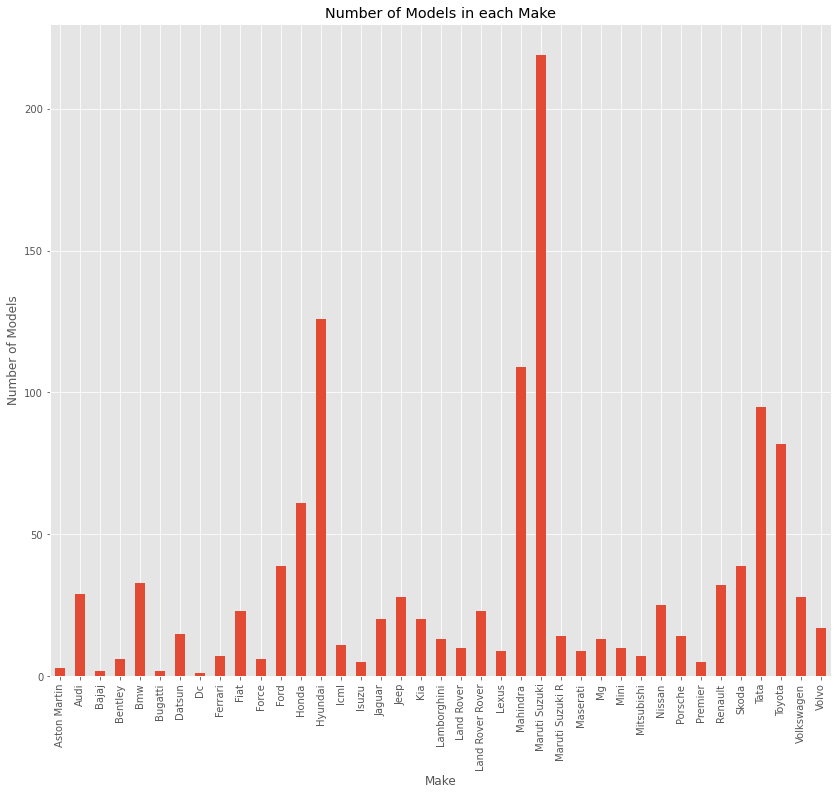

In [125]:
df_u_make=df.groupby(['Make'])['Ex-Showroom_Price'].nunique()
df_u_make.plot(kind='bar' , figsize=(14, 12))

plt.title('Number of Models in each Make')
plt.ylabel('Number of Models')
plt.xlabel('Make')

plt.savefig('./bar/no_models_make.png')
plt.show()


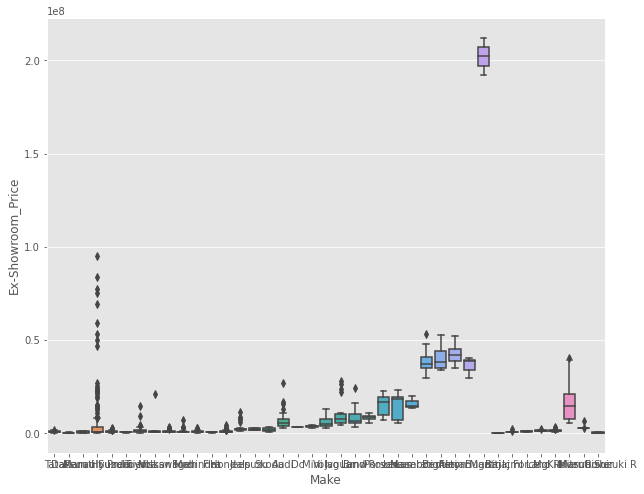

<Figure size 720x576 with 0 Axes>

In [89]:

plt.rcParams['figure.figsize'] = (10,8)
sns.boxplot(x=df["Make"],y=df['Ex-Showroom_Price'])
plt.show()
plt.savefig('./box/make_price.png')

In [90]:
df_make_unique = df['Make'].unique()
df_make_unique=df_make_unique.tolist()
df_make_unique


['Tata',
 'Datsun',
 'Renault',
 'Maruti Suzuki',
 'Hyundai',
 'Premier',
 'Toyota',
 'Nissan',
 'Volkswagen',
 'Ford',
 'Mahindra',
 'Fiat',
 'Honda',
 'Jeep',
 'Isuzu',
 'Skoda',
 'Audi',
 'Dc',
 'Mini',
 'Volvo',
 'Jaguar',
 'Bmw',
 'Land Rover',
 'Porsche',
 'Lexus',
 'Maserati',
 'Lamborghini',
 'Bentley',
 'Ferrari',
 'Aston Martin',
 'Bugatti',
 'Bajaj',
 'Icml',
 'Force',
 'Mg',
 'Kia',
 'Land Rover Rover',
 'Mitsubishi',
 'Maruti Suzuki R']

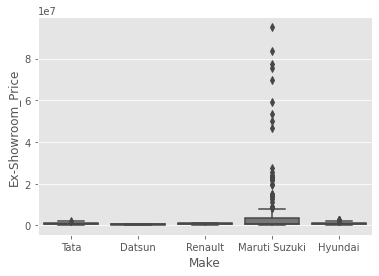

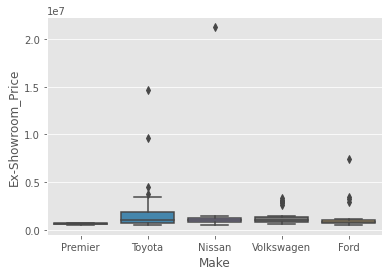

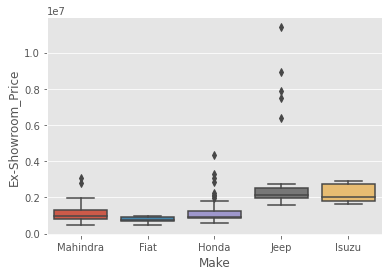

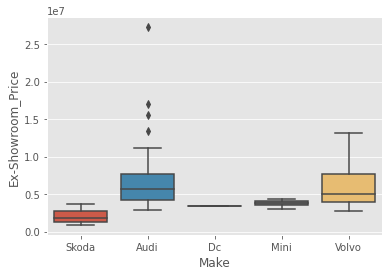

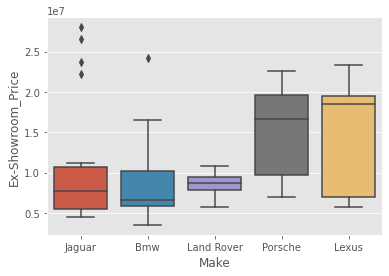

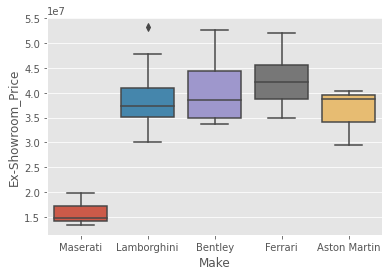

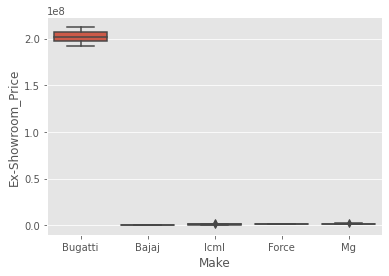

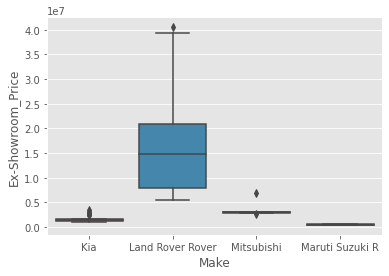

In [124]:
for index in range(len(df_make_unique)):
    abc = pd.DataFrame()
    
    # print(df_make_unique[index])
    
    for i in range(len(df_make_unique[index])):
        # print(df.loc[df['Make'] == df_make_unique[index][i]].head())
        abc_new_row=df.loc[df['Make'] == df_make_unique[index][i]]
        abc = pd.concat([abc, abc_new_row])
    # print(abc[abc.index.duplicated()])
    # abc = abc[~abc.index.duplicated(keep='first')]
    # print(abc)
    sns.boxplot(x=abc['Make'],y=df['Ex-Showroom_Price'])
    plt.savefig('./box/make_5_'+str(index)+'.png')
    plt.show()
    del abc
    del abc_new_row
    # abc.iloc[0:0]


In [91]:
def divide_chunks(l, n):
    for i in range(0, len(l), n): 
        yield l[i:i + n]
  
n = 5
  
df_make_unique = list(divide_chunks(df_make_unique, n))
print (df_make_unique)

[['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai'], ['Premier', 'Toyota', 'Nissan', 'Volkswagen', 'Ford'], ['Mahindra', 'Fiat', 'Honda', 'Jeep', 'Isuzu'], ['Skoda', 'Audi', 'Dc', 'Mini', 'Volvo'], ['Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus'], ['Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin'], ['Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg'], ['Kia', 'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R']]


<BarContainer object of 3 artists>

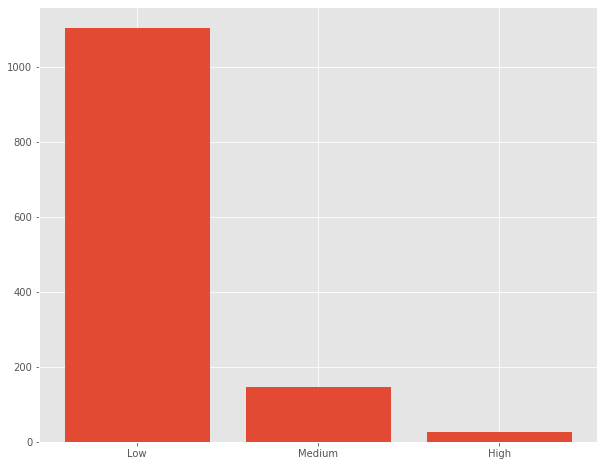

In [93]:
bins = np.linspace(min(df["Displacement"]), max(df["Displacement"]), 4)
bins

group_names = ['Low', 'Medium', 'High']

df['Displacement-binned'] = pd.cut(df['Displacement'], bins, labels=group_names, include_lowest=True )


df[['Displacement','Displacement-binned']].head(20)


df["Displacement-binned"].value_counts()

plt.bar(group_names, df["Displacement-binned"].value_counts())


# set x/y labels and plot title
# plt.pyplot.xlabel("horsepower")
# plt.pyplot.ylabel("count")
# plt.pyplot.title("horsepower bins")

In [94]:
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# from wordcloud import WordCloud 


# df_u_make=dict(df_u_make)
# # df_u_make
# wordcloud = WordCloud(collocations=False).generate_from_frequencies(df_u_make)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()
# plt.savefig('./wordcloud/make.png')

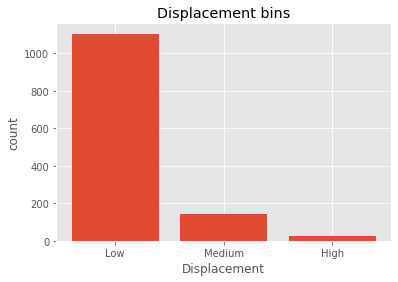

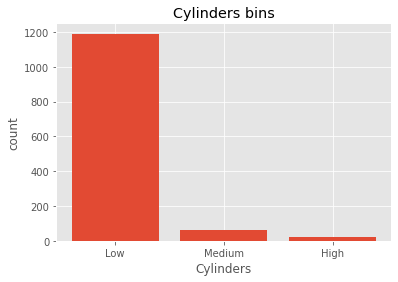

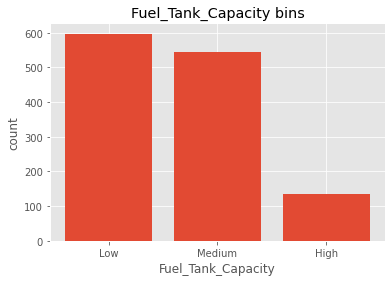

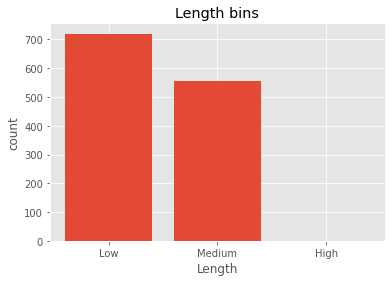

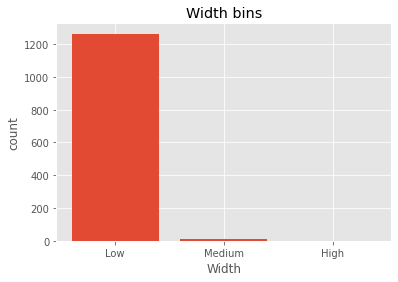

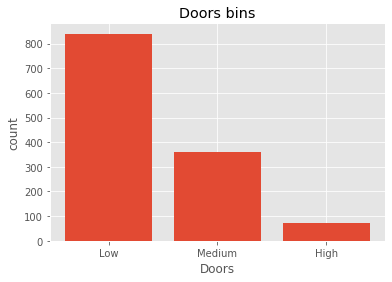

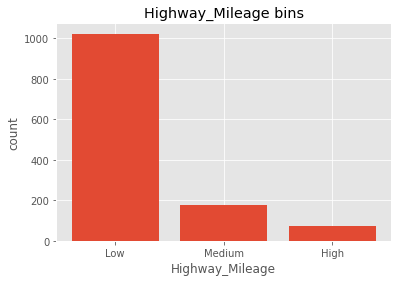

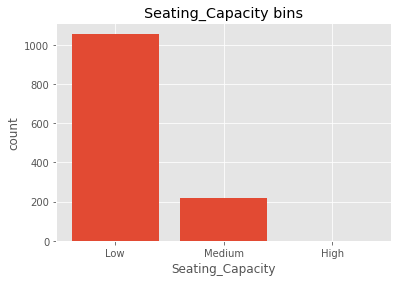

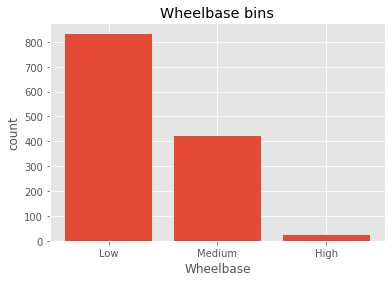

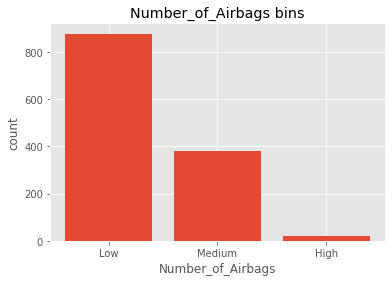

In [123]:
hc = [
'Displacement',
'Cylinders',
'Fuel_Tank_Capacity',
'Length',
'Width',
'Doors',
'Highway_Mileage', 
'Seating_Capacity',
'Wheelbase',
'Number_of_Airbags']
for i in hc :
  bins = np.linspace(min(df[i]), max(df[i]), 4)

  group_names = ['Low', 'Medium', 'High']

  df[i+'-binned'] = pd.cut(df[i], bins, labels=group_names, include_lowest=True )
  
  plt.bar(group_names, df[i+"-binned"].value_counts())

  # set x/y labels and plot title
  plt.xlabel(i)
  plt.ylabel("count")
  plt.title(i+" bins")
  plt.savefig('./bar/bin_'+str(i)+'.png')
  plt.show()

  # df[['Displacement','Displacement-binned']].head(20)


  # df["Displacement-binned"].value_counts()

  

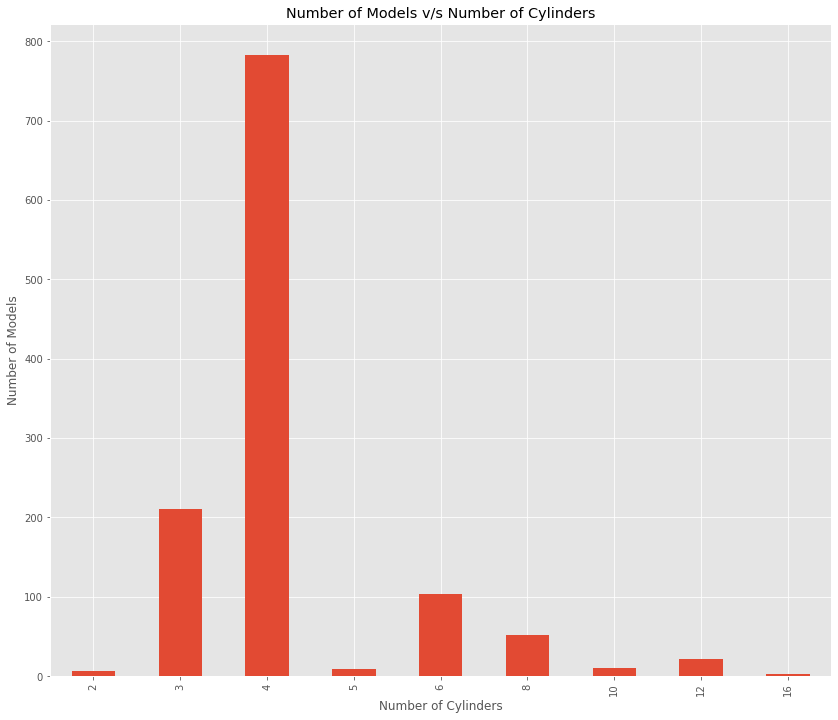

In [122]:
df_u=df.groupby(['Cylinders'])['Ex-Showroom_Price'].nunique()
df_u.plot(kind='bar' , figsize=(14, 12))

plt.title('Number of Models v/s Number of Cylinders')
plt.ylabel('Number of Models')
plt.xlabel('Number of Cylinders')

plt.savefig('./bar/no_cylinders.png')
plt.show()

In [97]:
bool_columns=df.select_dtypes(include=['bool']).columns
bool_columns=bool_columns.tolist()

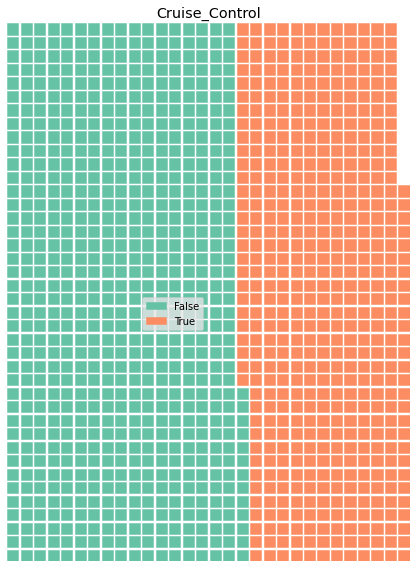

In [98]:
df_u_tf=df.groupby(['Cruise_Control']).nunique()

df_u_tf=df_u_tf.reset_index()
df_u_tf
fig = plt.figure(
    FigureClass=Waffle, 
    rows=40, 
    values=list(df_u_tf['Ex-Showroom_Price']),
    labels=list(df_u_tf.Cruise_Control),
    title={
        'label': 'Cruise_Control',
    },
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0.5, 0.5)}    
)
plt.savefig('./waffle/Cruise_Control.png')


C:\Users\devik\AppData\Local\Temp\ipykernel_98240\3938084252.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(


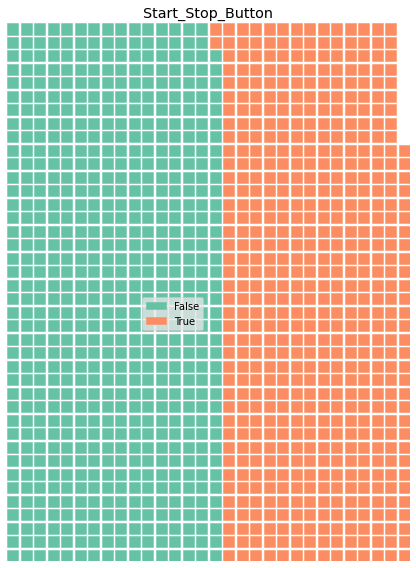

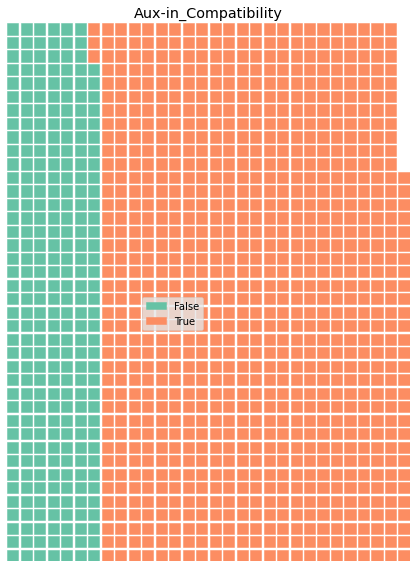

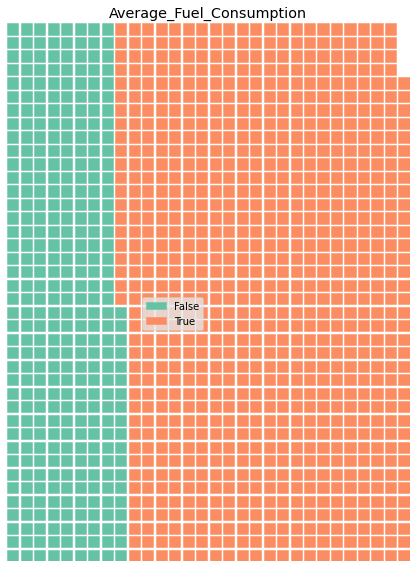

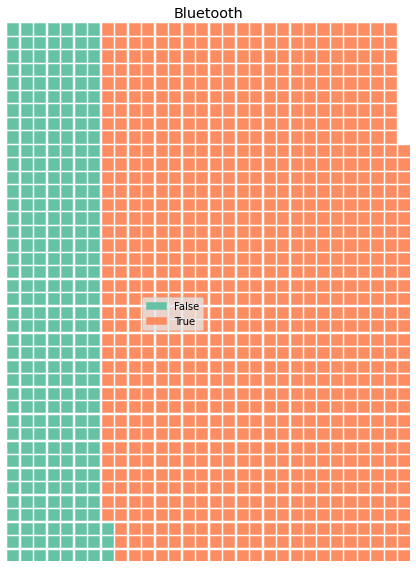

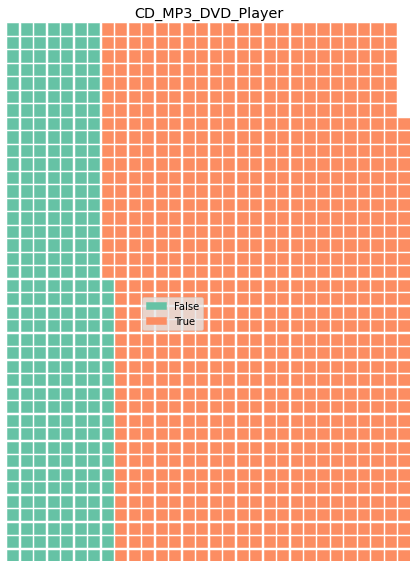

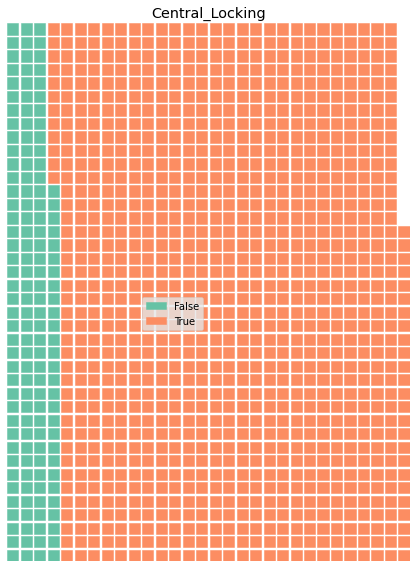

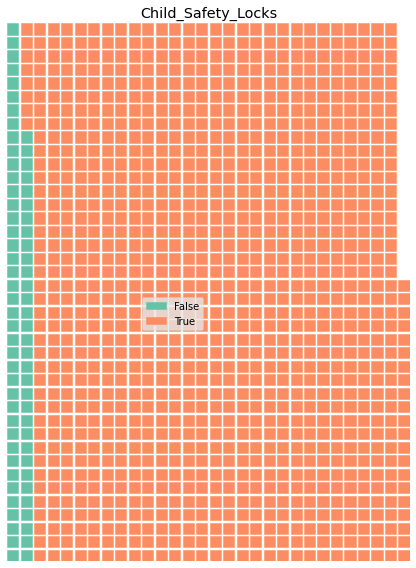

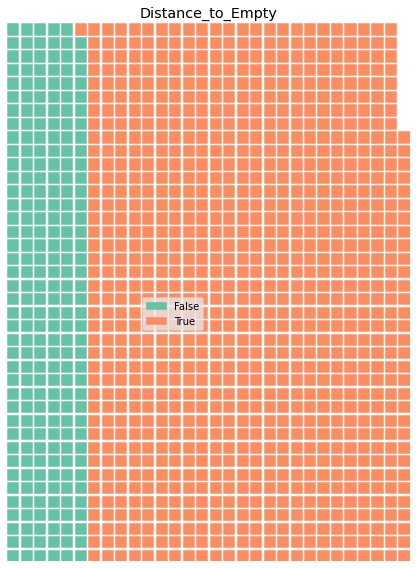

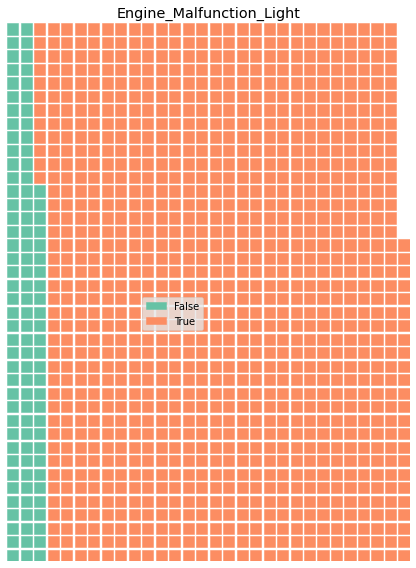

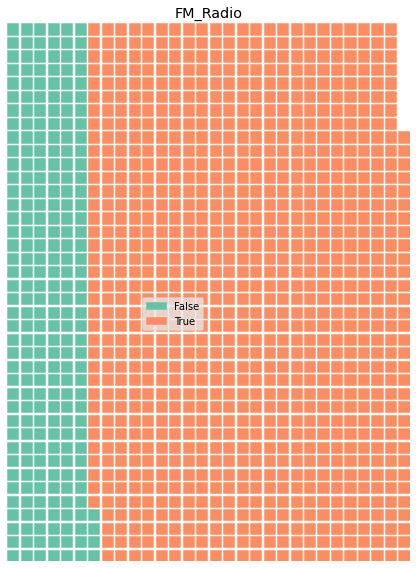

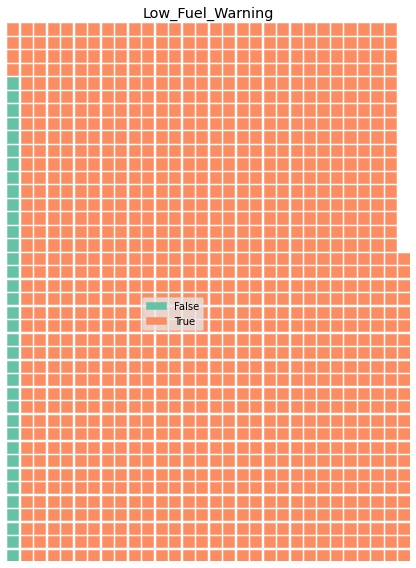

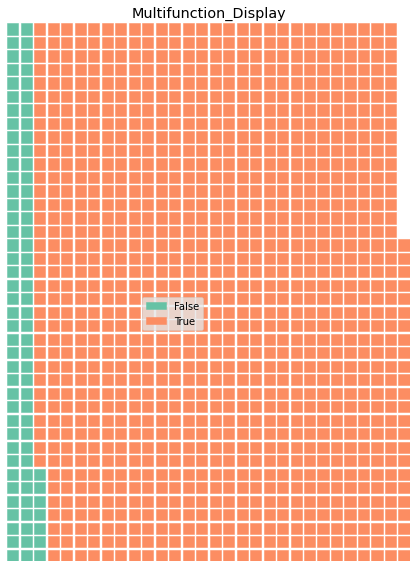

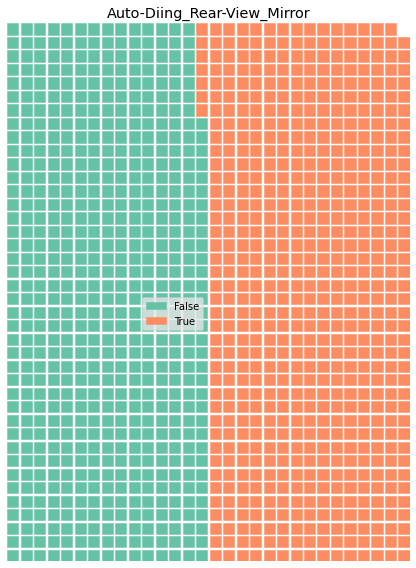

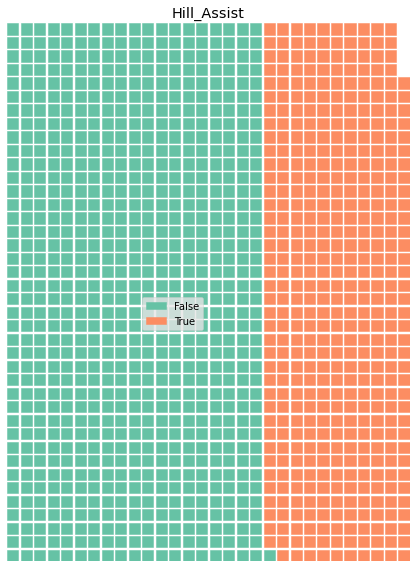

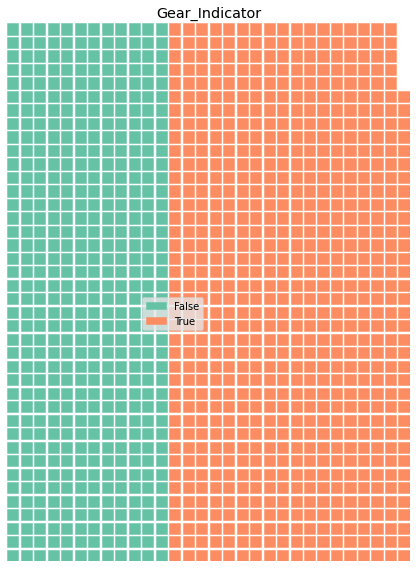

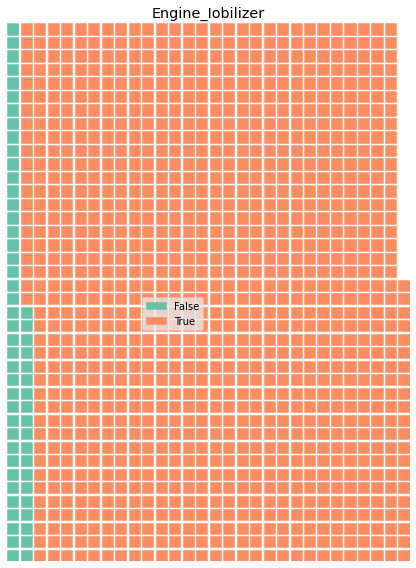

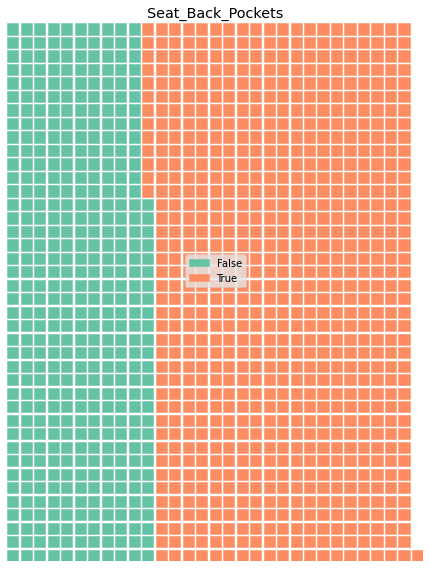

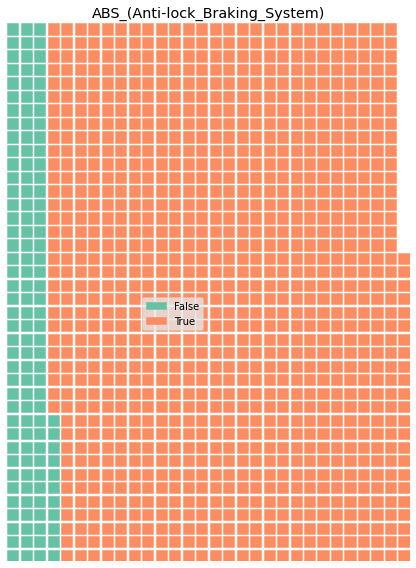

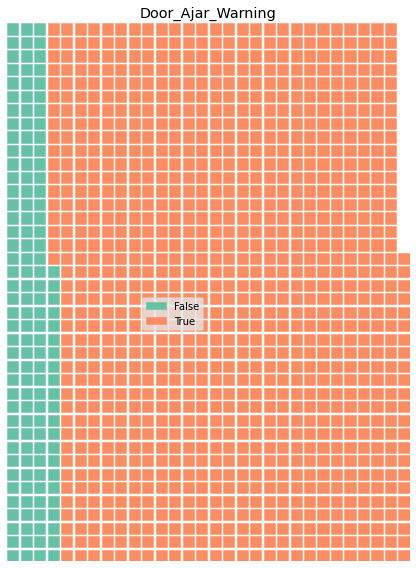

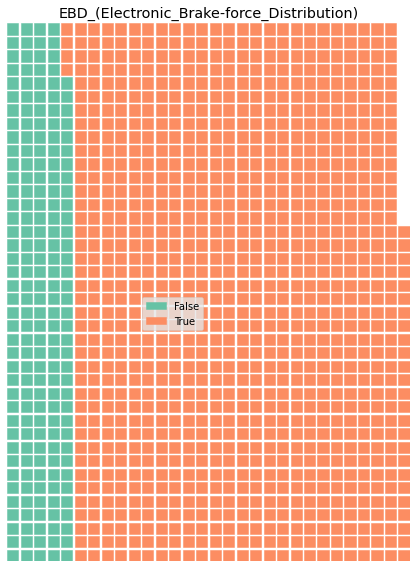

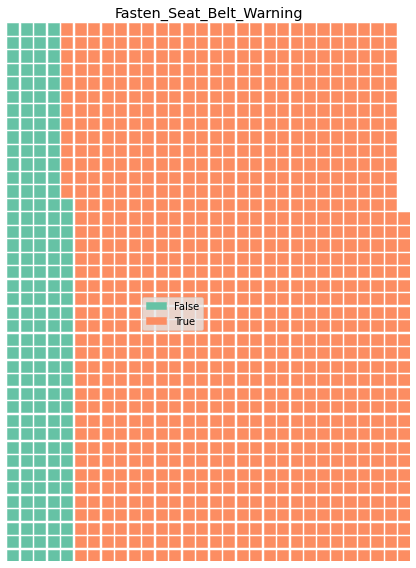

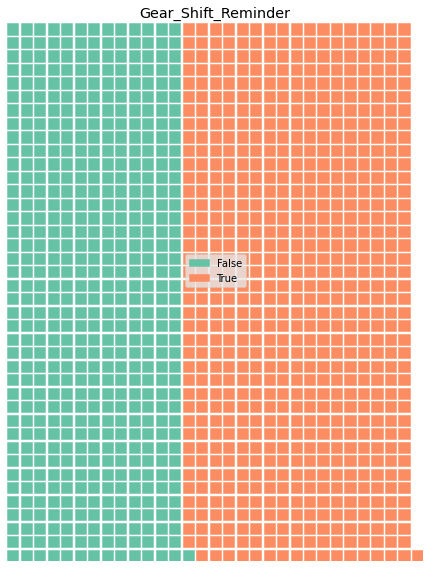

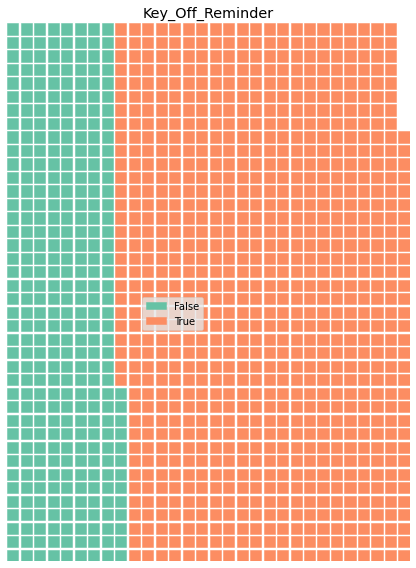

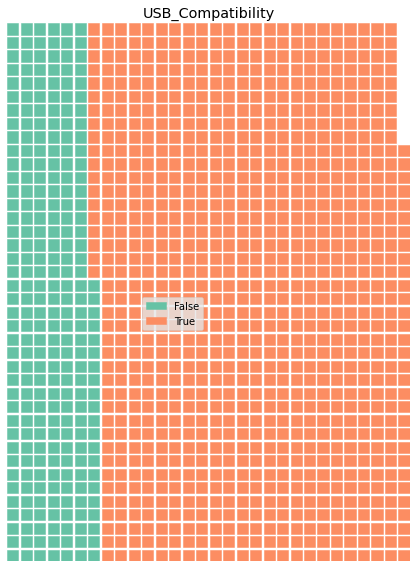

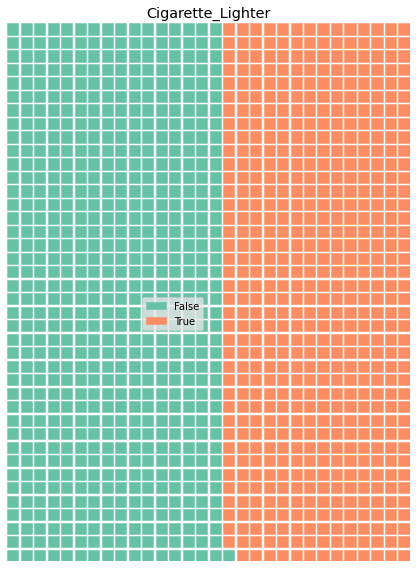

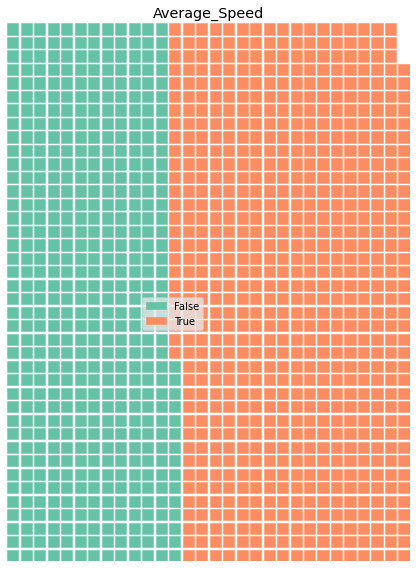

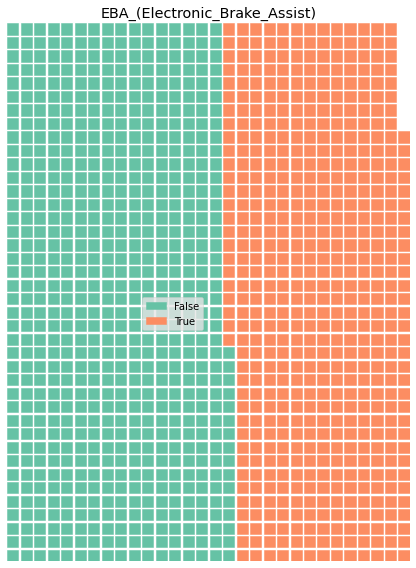

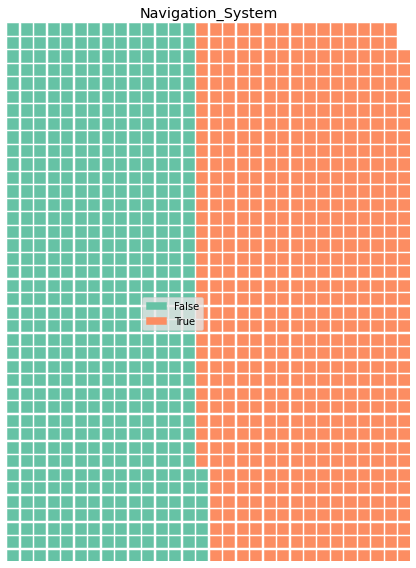

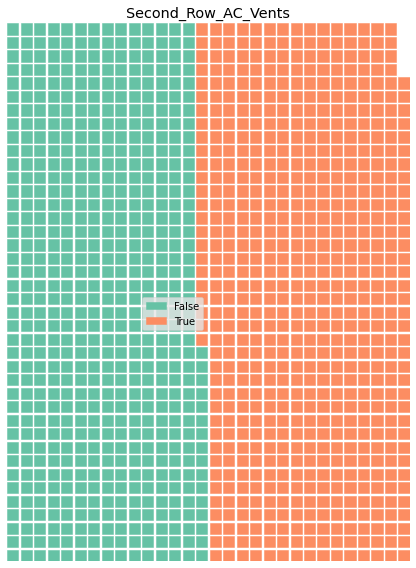

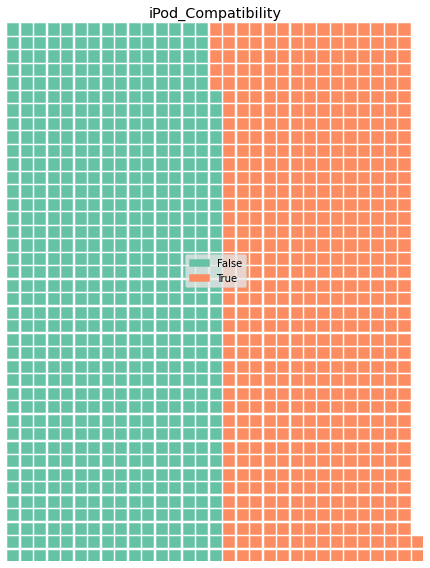

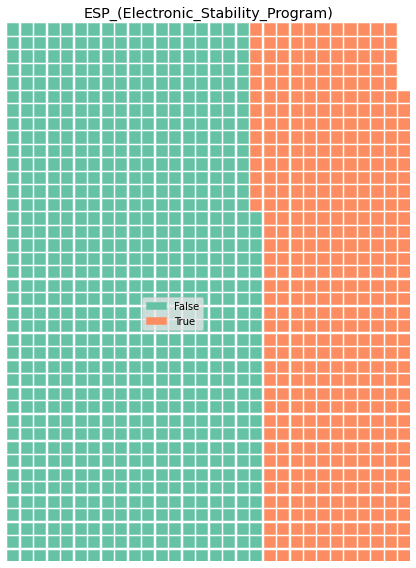

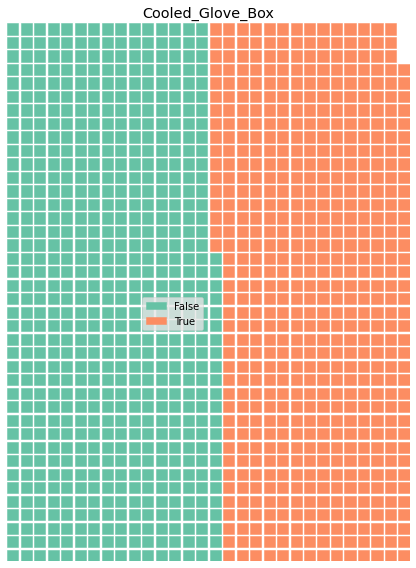

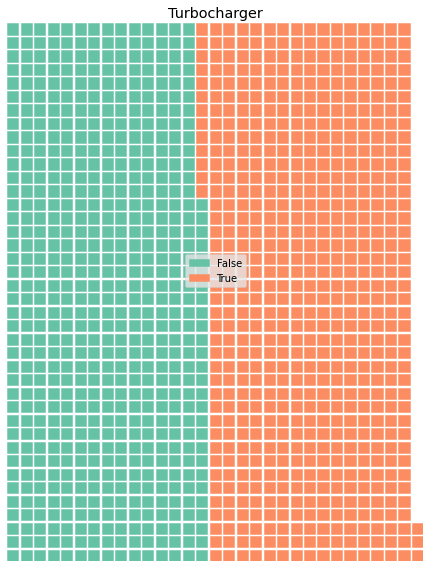

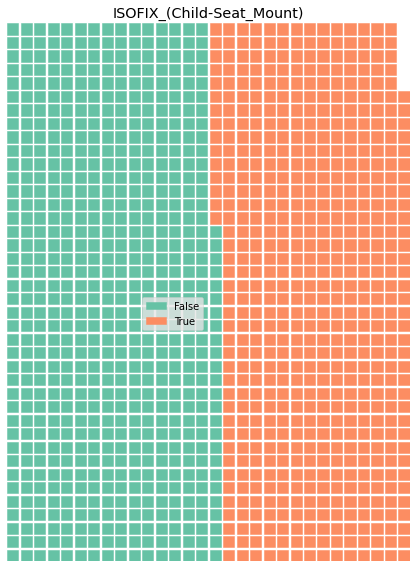

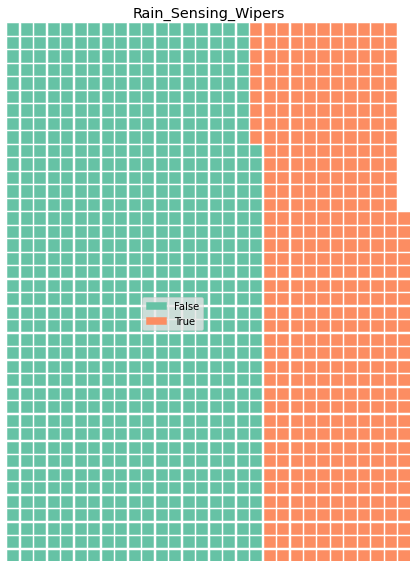

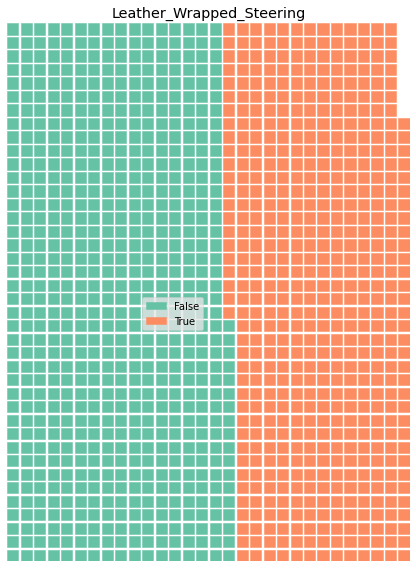

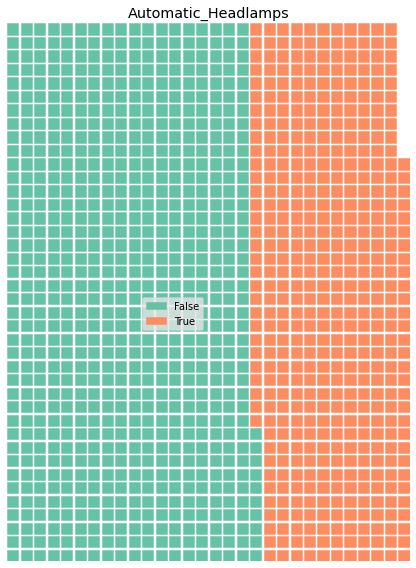

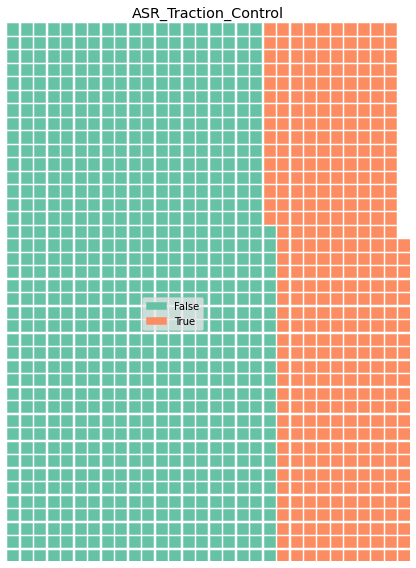

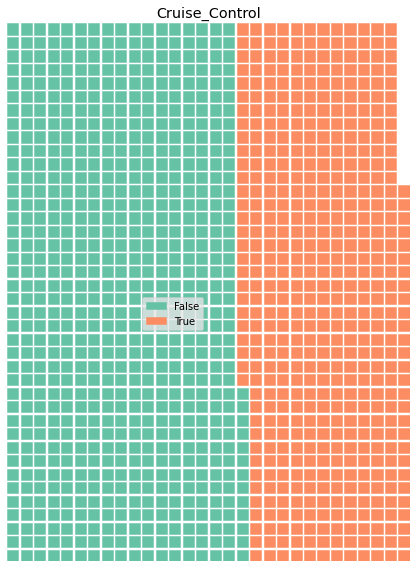

In [100]:
bool_columns=df.select_dtypes(include=['bool']).columns
bool_columns=bool_columns.tolist()

for i in bool_columns :
  df_u_tf=df.groupby([i]).nunique()

  df_u_tf=df_u_tf.reset_index()
  # df_u_tf
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=40, 
      values=list(df_u_tf['Ex-Showroom_Price']),
      labels=list(df_u_tf[i]),
      title={
        'label': i,
      },
      figsize=(12, 8),
      legend={'bbox_to_anchor': (0.5, 0.5)}    
  )
  plt.savefig('./waffle/'+str(i)+'.png')
  

In [102]:
float_columns=df.select_dtypes(include=['float']).columns
float_columns=float_columns.tolist()
float_columns

['Fuel_Tank_Capacity',
 'Height',
 'Length',
 'Width',
 'City_Mileage',
 'Highway_Mileage',
 'Ground_Clearance',
 'Minimum_Turning_Radius']

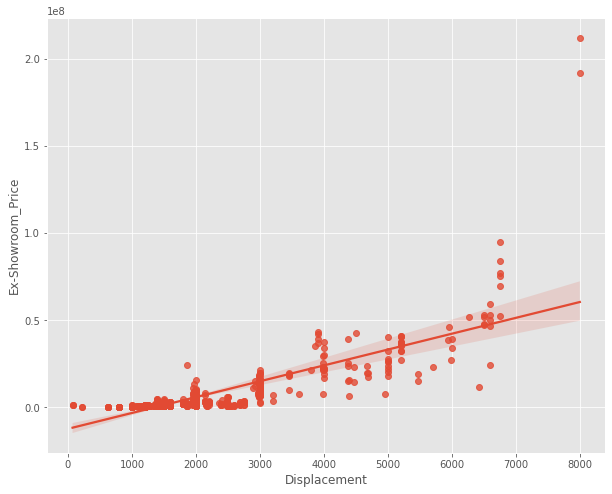

In [103]:
float_columns=[
 'Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Fuel_Tank_Capacity',
 'Height',
 'Length',
 'Width',
 'Doors',
 'City_Mileage',
 'Ground_Clearance',
 'Seating_Capacity',
 'Wheelbase',
 'Minimum_Turning_Radius',
 'Number_of_Airbags']

import seaborn as sns
import matplotlib.pyplot as plt
  
# draw regplot

sns.regplot(x = "Displacement", 
            y = "Ex-Showroom_Price", 
            data = df)
  
# show the plot
plt.show()


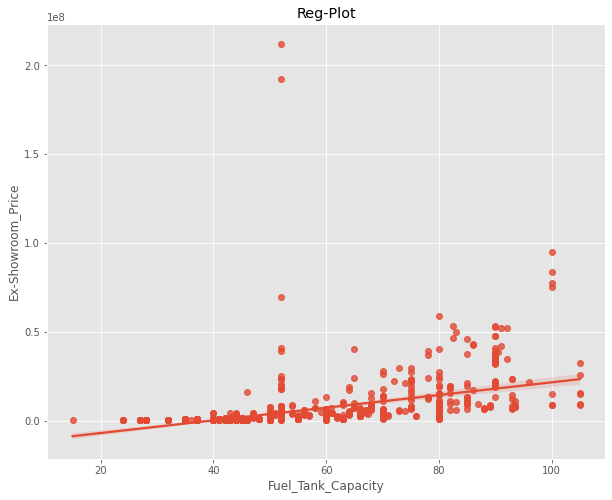

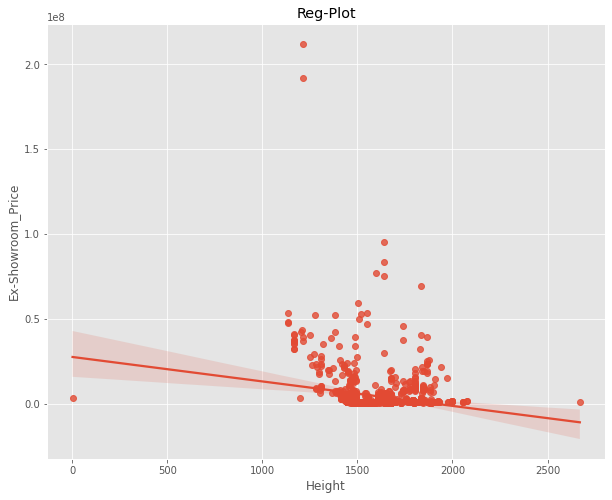

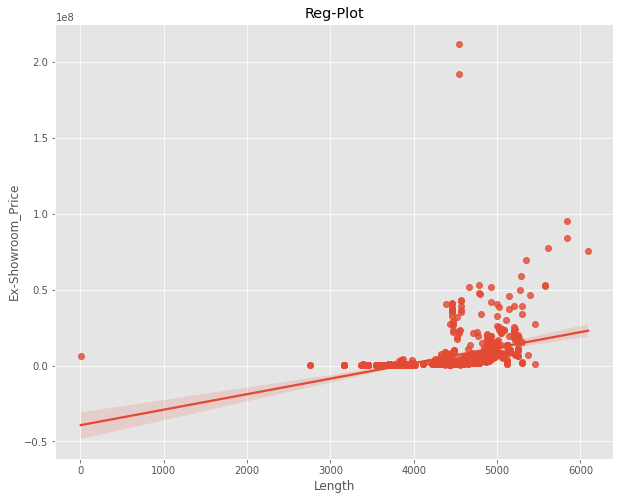

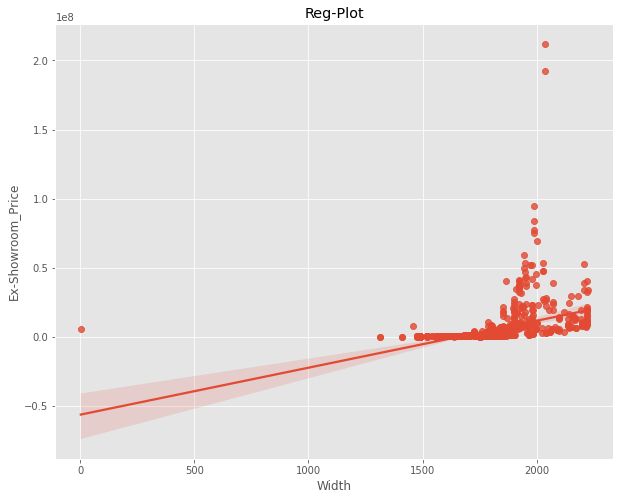

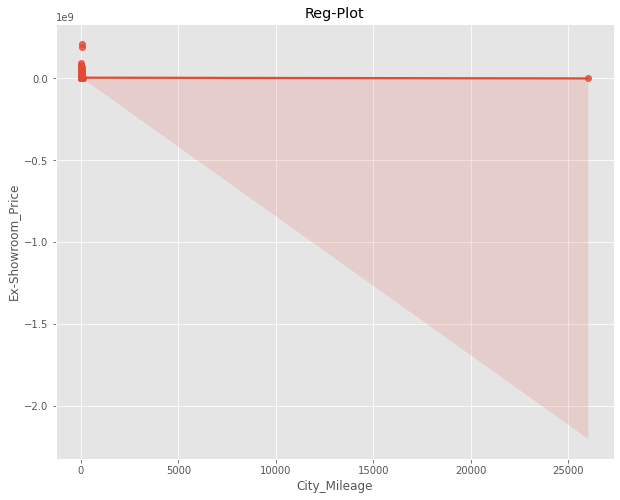

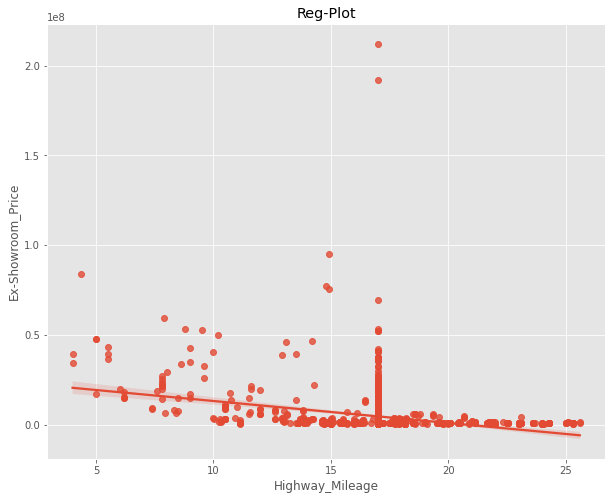

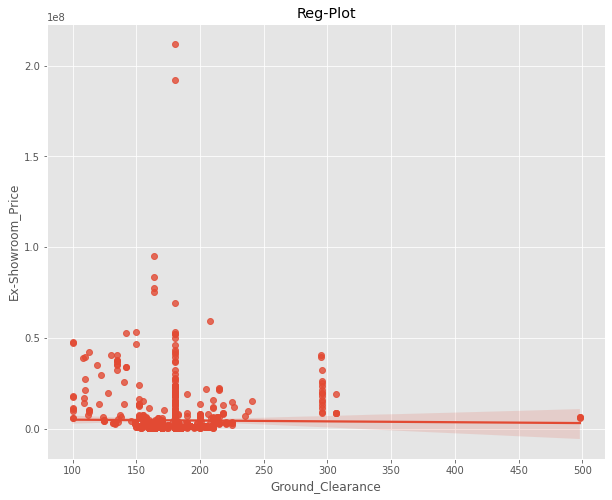

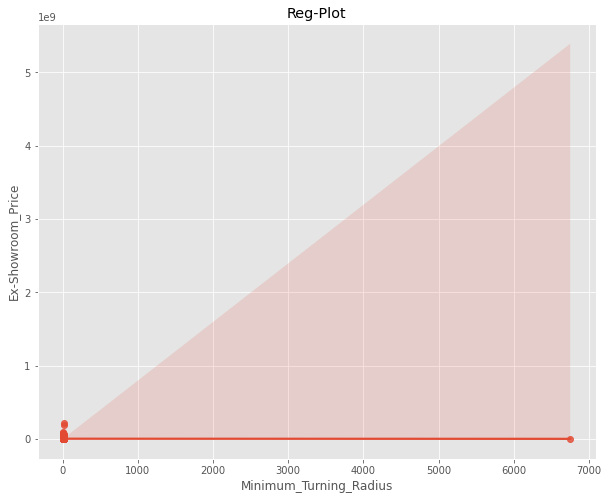

In [108]:
float_columns=df.select_dtypes(include=['float']).columns
float_columns=float_columns.tolist()

for i in float_columns :
  sns.regplot(x = i, 
            y = "Ex-Showroom_Price", 
            data = df)
  plt.title('Reg-Plot')
  if(np.polyfit(df[i],df["Ex-Showroom_Price"],1)[0]>0):
    plt.savefig('./reg-plot/positive/'+str(i)+'.png')
  else:
    plt.savefig('./reg-plot/negative/'+str(i)+'.png')
  plt.show()
  

<AxesSubplot:ylabel='Ex-Showroom_Price'>

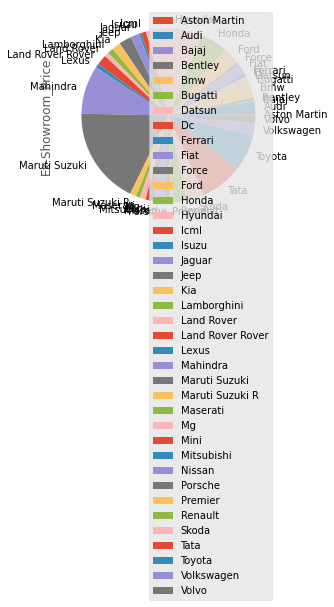

In [111]:
#Pie charts for object Variables

df.groupby(['Make']).nunique().plot(kind='pie',y='Ex-Showroom_Price')

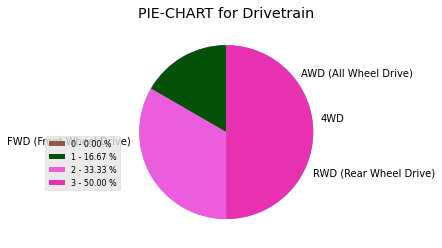

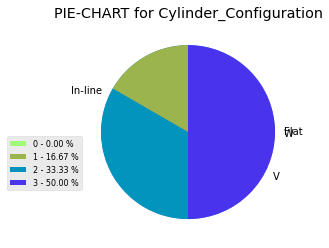

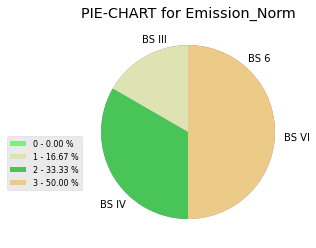

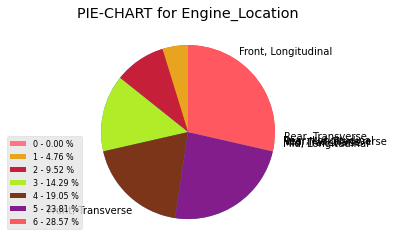

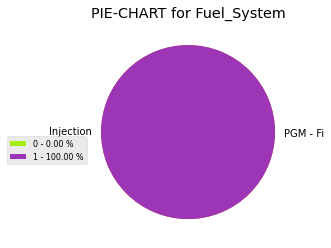

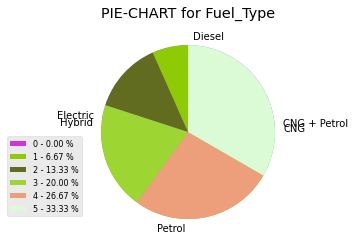

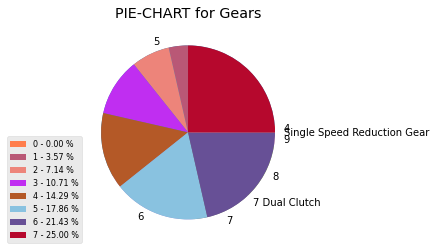

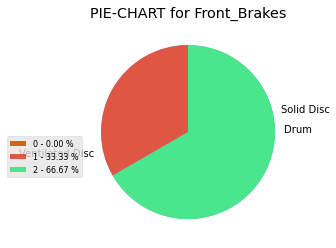

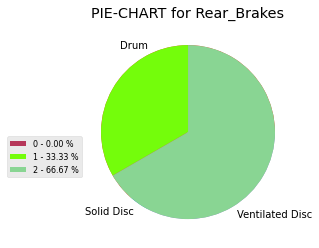

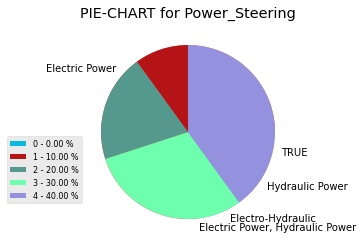

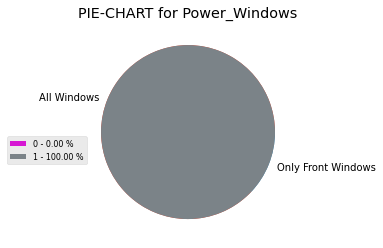

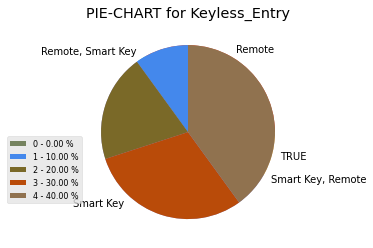

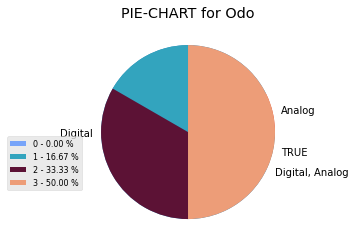

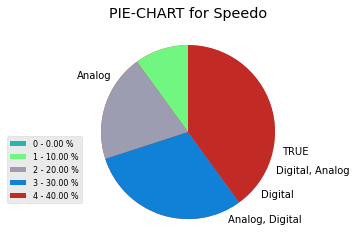

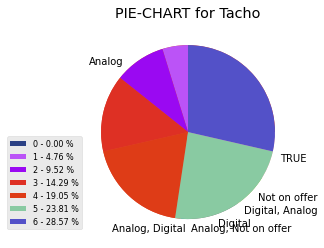

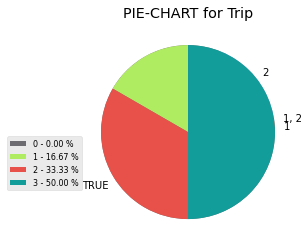

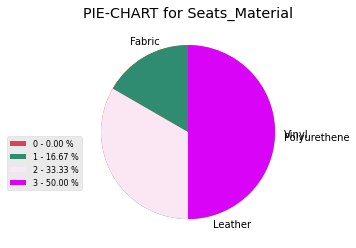

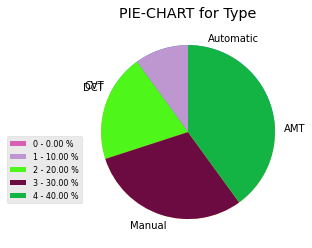

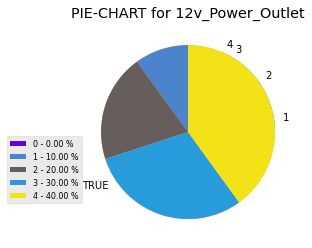

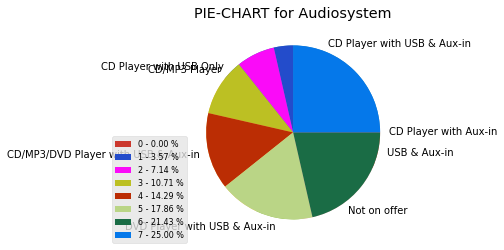

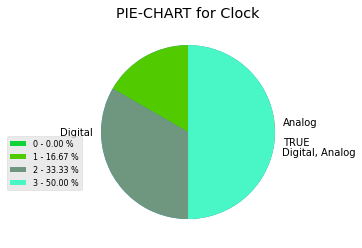

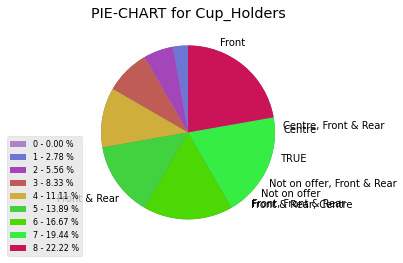

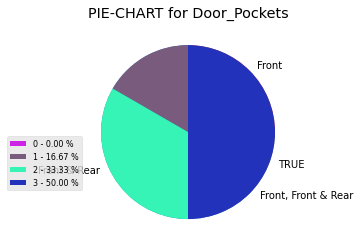

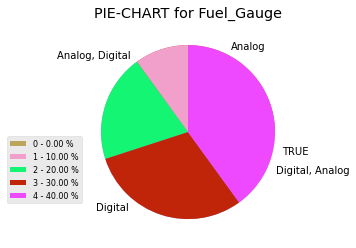

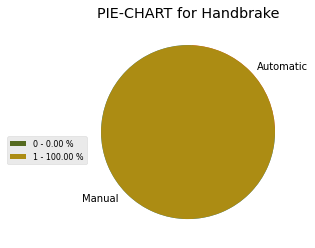

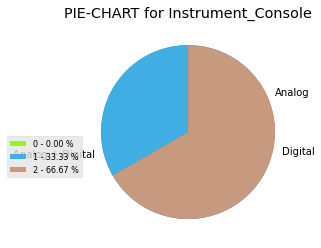

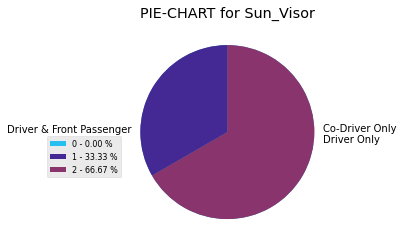

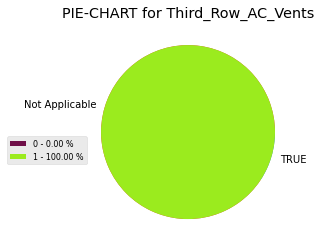

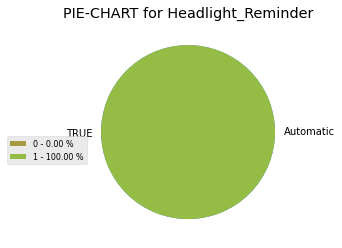

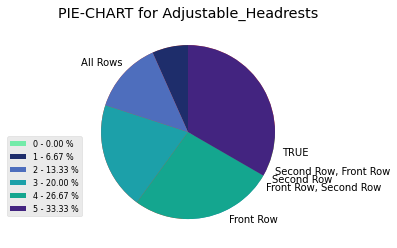

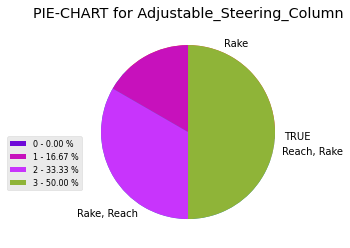

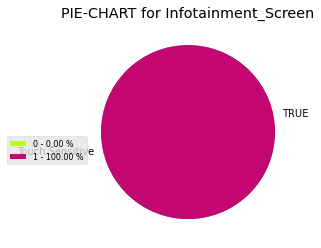

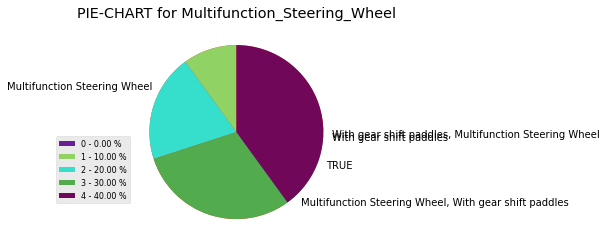

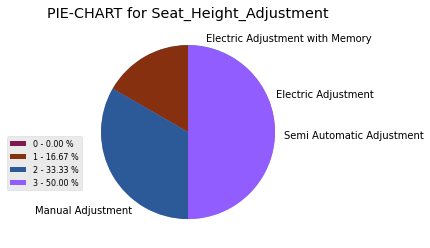

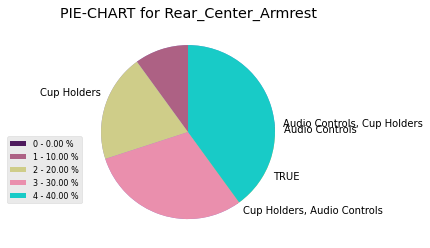

In [112]:


object_columns=df.select_dtypes(include=['object']).columns
object_columns=object_columns.tolist()

for i in object_columns :
  if(df[i].nunique()<10):
    df.groupby([i]).nunique().plot(kind='pie',y='Ex-Showroom_Price')
    n = df[i].nunique()
    slices = np.arange(n)
    activities = np.arange(n)
    colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(n)]

    patches, texts = plt.pie(slices, colors=colors, startangle=90)

    labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(activities,100.*slices/slices.sum())]
    plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.35, .5), fontsize=8)
    plt.title('PIE-CHART for '+i)
    plt.ylabel('')
    plt.savefig('./pie/'+str(i)+'.png')
    plt.show()
    
    

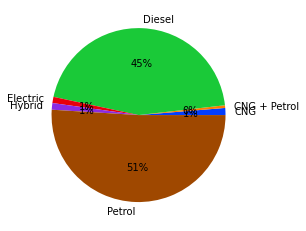

In [113]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

df_ft=df.groupby(['Fuel_Type']).nunique()

df_ft=df_ft.reset_index()
df_ft_list=df_ft['Fuel_Type'].tolist()

# plotting data on chart
plt.pie(df_ft['Ex-Showroom_Price'],labels=df_ft_list, colors=palette_color, autopct='%.0f%%')
  
# # displaying chart

plt.show()


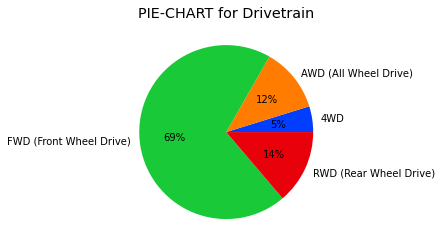

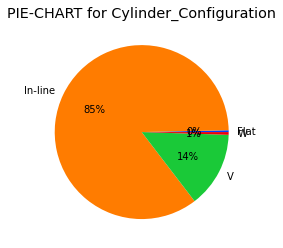

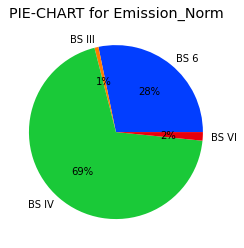

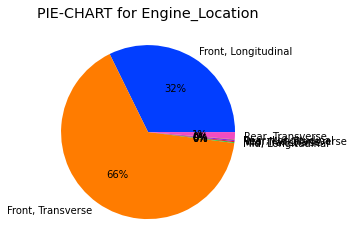

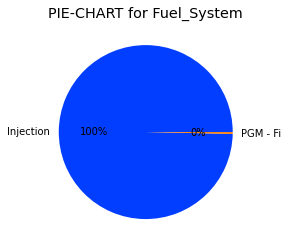

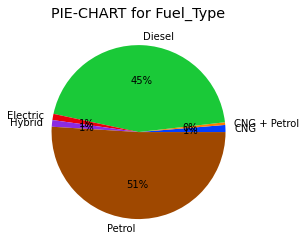

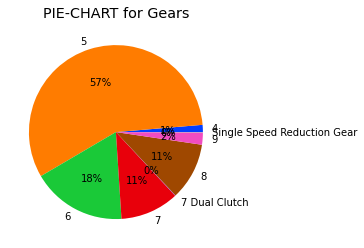

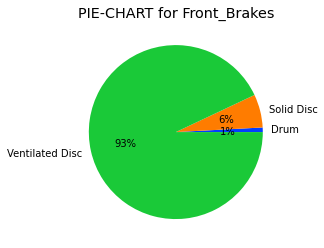

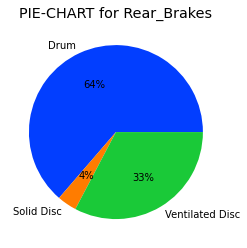

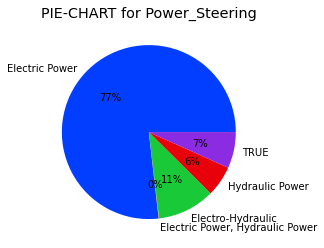

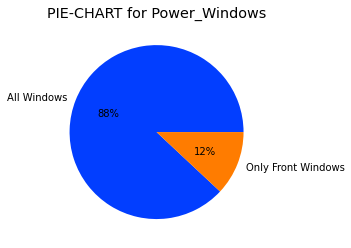

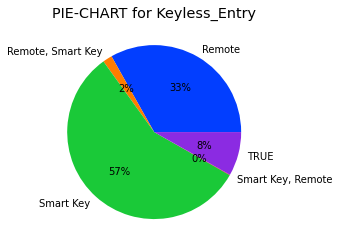

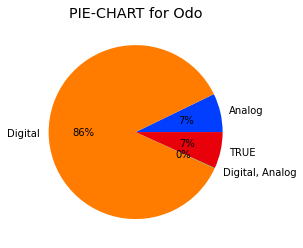

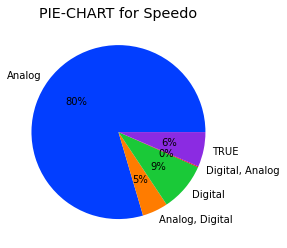

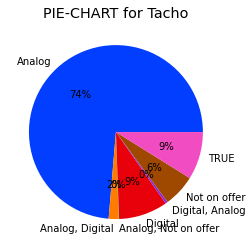

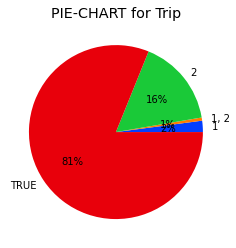

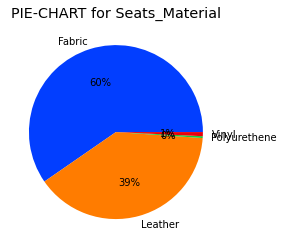

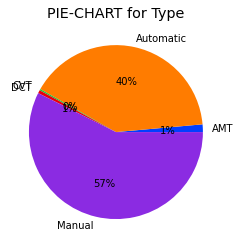

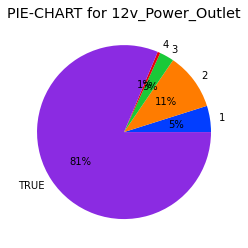

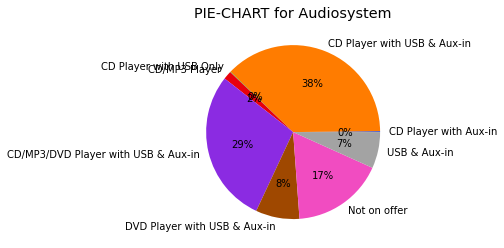

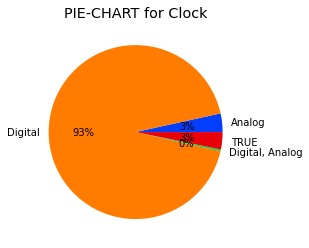

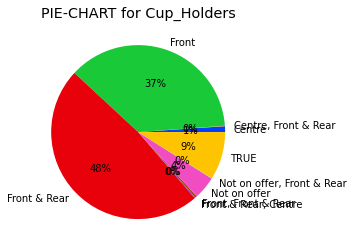

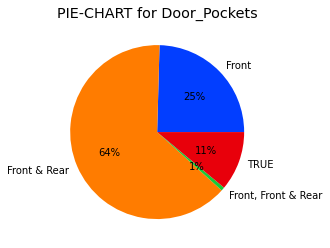

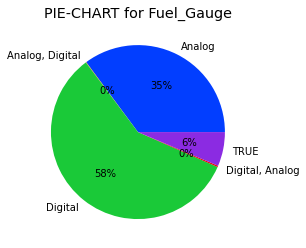

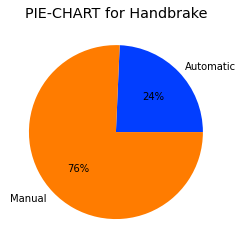

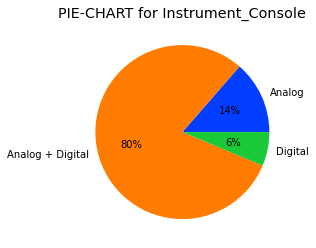

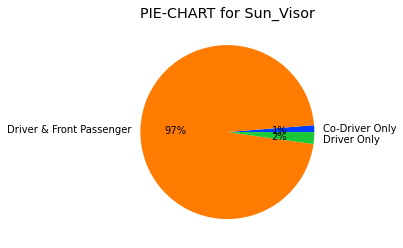

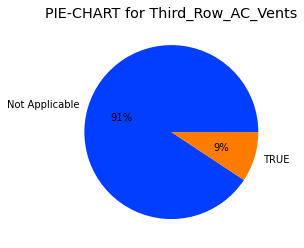

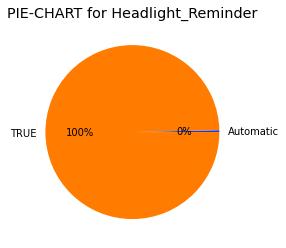

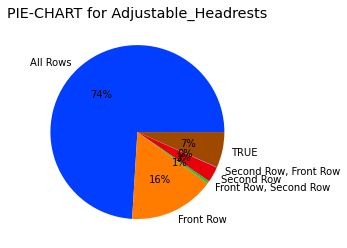

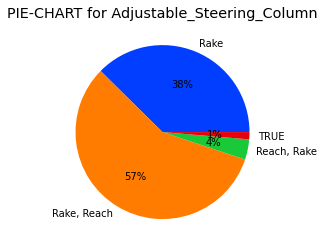

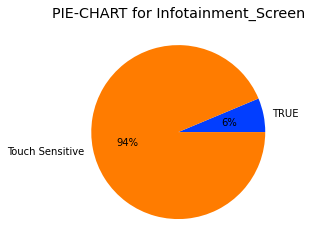

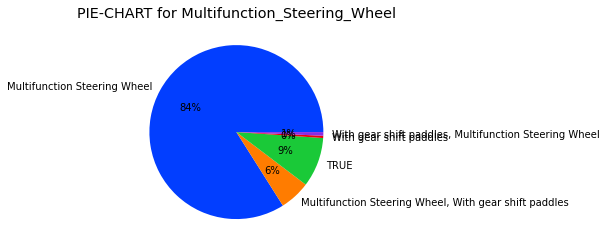

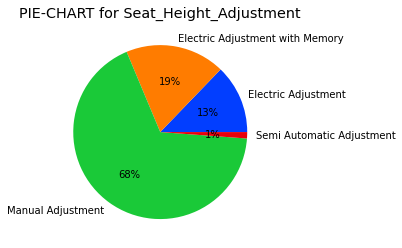

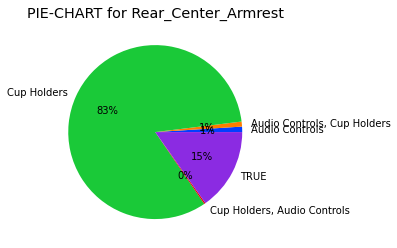

In [115]:
object_columns=df.select_dtypes(include=['object']).columns
object_columns=object_columns.tolist()

for i in object_columns :
  if(df[i].nunique()<10):
    palette_color = sns.color_palette('bright')

    df_ft=df.groupby([i]).nunique()

    df_ft=df_ft.reset_index()
    df_ft_list=df_ft[i].tolist()

    # plotting data on chart
    plt.pie(df_ft['Ex-Showroom_Price'],labels=df_ft_list, colors=palette_color, autopct='%.0f%%')
  
    # displaying chart
    plt.title('PIE-CHART for '+i)
    plt.savefig('./pie2/'+str(i)+'.png')
    plt.show()

                     Ex-Showroom_Price                        \
Drivetrain                         4WD AWD (All Wheel Drive)   
Engine_Location                                                
Front, Longitudinal       1.405172e+07          1.382248e+07   
Front, Transverse         5.490383e+06          1.141580e+07   
Mid, Longitudinal                  NaN          2.724500e+07   
Mid, Transverse                    NaN                   NaN   
Rear Mid, Transverse               NaN          1.813200e+07   
Rear, Longitudinal                 NaN          3.938208e+07   
Rear, Transverse                   NaN          3.848543e+07   

                                                                     
Drivetrain           FWD (Front Wheel Drive) RWD (Rear Wheel Drive)  
Engine_Location                                                      
Front, Longitudinal             1.826094e+06           9.232602e+06  
Front, Transverse               1.185572e+06           4.270318e+06  
Mid, Long

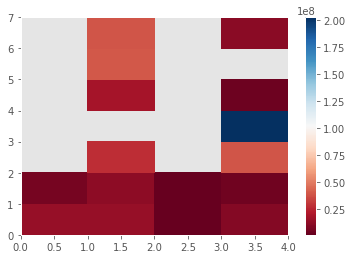

In [117]:
# enginelocation drive_train fuel_type 
df_test1=df[['Engine_Location','Drivetrain','Ex-Showroom_Price']]
df_grp1 = df_test1.groupby(['Engine_Location','Drivetrain'],as_index=False).mean()
# print(df_grp1)

df_pivot1=df_grp1.pivot(index='Engine_Location',columns='Drivetrain')
print(df_pivot1)
plt.pcolor(df_pivot1,cmap='RdBu')
plt.colorbar()
plt.savefig('./pivot/Engine_Location_Drivetrain.png')
plt.show()

                            Highway_Mileage                                   \
Fuel_Type                               CNG CNG + Petrol     Diesel Electric   
Gears                                                                          
4                                      17.0          NaN  19.500000      NaN   
5                                      17.0    17.583333  17.816754     17.0   
6                                       NaN          NaN  17.132564      NaN   
7                                       NaN          NaN  17.360526      NaN   
7 Dual Clutch                           NaN          NaN        NaN      NaN   
8                                       NaN          NaN  16.531639      NaN   
9                                       NaN          NaN  16.935000      NaN   
Single Speed Reduction Gear             NaN          NaN        NaN     17.0   

                                                
Fuel_Type                    Hybrid     Petrol  
Gears                

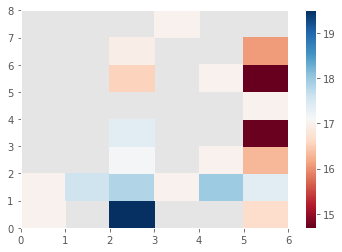

In [118]:
# gears and fueltype highway mileage
df_test2=df[['Gears','Fuel_Type','Highway_Mileage']]
df_grp2 = df_test2.groupby(['Gears','Fuel_Type'],as_index=False).mean()
# print(df_grp2)
df_pivot2=df_grp2.pivot(index='Gears',columns='Fuel_Type')
print(df_pivot2)
plt.pcolor(df_pivot2,cmap='RdBu')
plt.colorbar()
plt.savefig('./pivot/Gears_Fuel_Type.png')
plt.show()

                        Ex-Showroom_Price                                   \
Body_Type                     Convertible         Coupe Coupe, Convertible   
Drivetrain                                                                   
4WD                           36019078.00  4.746770e+07                NaN   
AWD (All Wheel Drive)         30712241.25  3.230237e+07         43367500.0   
FWD (Front Wheel Drive)        9437398.40           NaN                NaN   
RWD (Rear Wheel Drive)        27789278.50  2.215978e+07                NaN   

                                                                      \
Body_Type                    Crossover Crossover, SUV      Hatchback   
Drivetrain                                                             
4WD                                NaN            NaN            NaN   
AWD (All Wheel Drive)              NaN      3675000.0            NaN   
FWD (Front Wheel Drive)  814852.611111            NaN  766102.375817   
RWD (Rear Wheel Drive

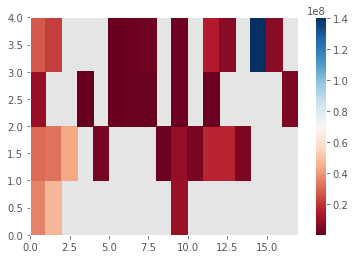

In [119]:
# drive_train bodytype price
df_test3=df[['Drivetrain','Body_Type','Ex-Showroom_Price']]
df_grp3 = df_test3.groupby(['Drivetrain','Body_Type'],as_index=False).mean()
# print(df_grp3)
df_pivot3=df_grp3.pivot(index='Drivetrain',columns='Body_Type')
print(df_pivot3)
plt.pcolor(df_pivot3,cmap='RdBu')
plt.colorbar()
plt.savefig('./pivot/Drivetrain_Body_Type.png')
plt.show()

                            Ex-Showroom_Price                                  \
Power_Steering                 Electric Power Electric Power, Hydraulic Power   
Gears                                                                           
4                                7.577874e+05                             NaN   
5                                1.322869e+06                        890200.0   
6                                1.616378e+06                             NaN   
7                                1.094636e+07                             NaN   
7 Dual Clutch                    2.121554e+08                             NaN   
8                                1.567470e+07                             NaN   
9                                6.934220e+06                             NaN   
Single Speed Reduction Gear      2.371858e+06                             NaN   

                                                                             
Power_Steering              El

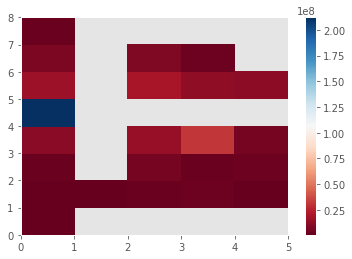

In [120]:
#  gears powersteering price
df_test4=df[['Gears','Power_Steering','Ex-Showroom_Price']]
df_grp4 = df_test4.groupby(['Gears','Power_Steering'],as_index=False).mean()
# print(df_grp4)

df_pivot4=df_grp4.pivot(index='Gears',columns='Power_Steering')
print(df_pivot4)
plt.pcolor(df_pivot4,cmap='RdBu')
plt.colorbar()
plt.savefig('./pivot/Gears_Power_Steering.png')
plt.show()

             Highway_Mileage                                          \
Cylinders                 2          3          4      5          6    
Fuel_Type                                                              
CNG                     17.0  17.000000  17.000000    NaN        NaN   
CNG + Petrol             NaN  17.000000  17.875000    NaN        NaN   
Diesel                   NaN  19.328444  17.570682  16.79  15.242222   
Electric                 NaN        NaN  17.000000    NaN        NaN   
Hybrid                   NaN        NaN  17.866667    NaN  17.000000   
Petrol                  17.0  18.426832  16.540688  17.00  15.655652   

                                                 
Cylinders            8      10         12    16  
Fuel_Type                                        
CNG                 NaN    NaN        NaN   NaN  
CNG + Petrol        NaN    NaN        NaN   NaN  
Diesel        13.600000    NaN        NaN   NaN  
Electric            NaN    NaN        NaN   NaN  
H

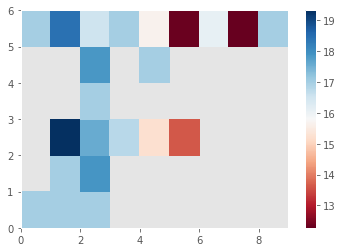

In [121]:
# fueltype cylinders mileage
df_test5=df[['Fuel_Type','Cylinders','Highway_Mileage']]
df_grp5 = df_test5.groupby(['Fuel_Type','Cylinders'],as_index=False).mean()
# print(df_grp5)

df_pivot5=df_grp5.pivot(index='Fuel_Type',columns='Cylinders')
print(df_pivot5)
plt.pcolor(df_pivot5,cmap='RdBu')
plt.colorbar()
plt.savefig('./pivot/Fuel_Type_Cylinders.png')
plt.show()